In [2]:
# IMPORTS
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# **CONFIG BLOCK (Input Size: 128×128)**

In [3]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING**

In [4]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


# BUILD VGG16 FROM SCRATCH 
model = Sequential([
 
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

 
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])


# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763386424.159362      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1763386430.263972     128 service.cc:148] XLA service 0x7f20e800b650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763386430.265147     128 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763386431.025081     128 cuda_dnn.cc:529] Loaded cuDNN version 90300


 2/77 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.2578 - loss: 1.0986  

I0000 00:00:1763386441.567666     128 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.3280 - loss: 1.0982

77/77 ━━━━━━━━━━━━━━━━━━━━ 39s 300ms/step - accuracy: 0.3281 - loss: 1.0981 - val_accuracy: 0.4413 - val_loss: 1.0696
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5903 - loss: 0.8100

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.5915 - loss: 0.8085 - val_accuracy: 0.7980 - val_loss: 0.5949
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7843 - loss: 0.5349

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.7844 - loss: 0.5345 - val_accuracy: 0.7986 - val_loss: 0.5214
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8048 - loss: 0.4774

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.8051 - loss: 0.4771 - val_accuracy: 0.8165 - val_loss: 0.4457
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8325 - loss: 0.3929

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.8327 - loss: 0.3929 - val_accuracy: 0.8608 - val_loss: 0.3804
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8748 - loss: 0.3479

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - accuracy: 0.8748 - loss: 0.3479 - val_accuracy: 0.8636 - val_loss: 0.3381
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.8540 - loss: 0.3533 - val_accuracy: 0.8003 - val_loss: 0.4501
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.8228 - loss: 0.4465 - val_accuracy: 0.8222 - val_loss: 0.4605
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8454 - loss: 0.3851

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.8456 - loss: 0.3848 - val_accuracy: 0.8855 - val_loss: 0.3158
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.8875 - loss: 0.3018 - val_accuracy: 0.8832 - val_loss: 0.3073
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.8736 - loss: 0.3084 - val_accuracy: 0.8792 - val_loss: 0.2997
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8932 - loss: 0.2762

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - accuracy: 0.8931 - loss: 0.2764 - val_accuracy: 0.9028 - val_loss: 0.2404
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.9024 - loss: 0.2446 - val_accuracy: 0.8918 - val_loss: 0.2589
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.8990 - loss: 0.2474 - val_accuracy: 0.8936 - val_loss: 0.2514
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9101 - loss: 0.2377

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9101 - loss: 0.2377 - val_accuracy: 0.9252 - val_loss: 0.2022
Epoch 16/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.9185 - loss: 0.1987 - val_accuracy: 0.9246 - val_loss: 0.1968
Epoch 17/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9056 - loss: 0.2304

77/77 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.9056 - loss: 0.2304 - val_accuracy: 0.9258 - val_loss: 0.2004
Epoch 18/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.9231 - loss: 0.1938 - val_accuracy: 0.9217 - val_loss: 0.1904
Epoch 19/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9241 - loss: 0.1853

77/77 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.9242 - loss: 0.1851 - val_accuracy: 0.9471 - val_loss: 0.1503
Epoch 20/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9448 - loss: 0.1561

77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - accuracy: 0.9447 - loss: 0.1563 - val_accuracy: 0.9609 - val_loss: 0.1195



# **EVALUATION AND METRICS**


55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.8724 - loss: 0.3384

 Test Accuracy: 92.34%
 Test Loss: 0.2173
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.9427    0.8488    0.8933       562
         Normal     0.8692    0.9360    0.9014       625
Viral Pneumonia     0.9713    0.9855    0.9783       550

       accuracy                         0.9234      1737
      macro avg     0.9278    0.9234    0.9243      1737
   weighted avg     0.9253    0.9234    0.9231      1737



<Figure size 800x600 with 0 Axes>

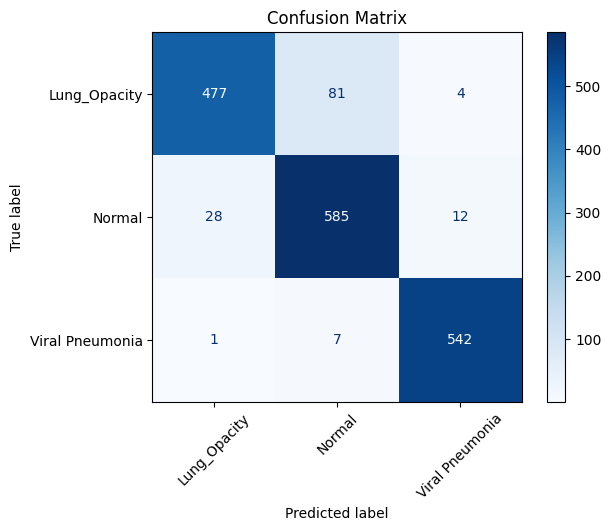

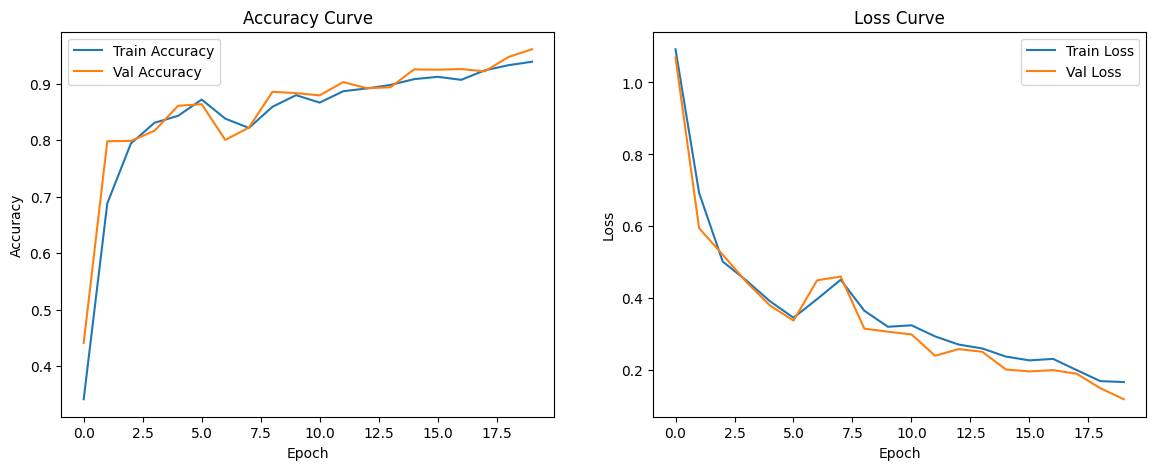

In [5]:
#  EVALUATE 
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **CONFIG BLOCK (Input Size: 256×256)**

In [7]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING**

In [8]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


# BUILD VGG16 FROM SCRATCH 
model = Sequential([
 
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

 
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])


# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.4616 - loss: 0.9604

E0000 00:00:1763386924.790271     129 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763386925.025371     129 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


77/77 ━━━━━━━━━━━━━━━━━━━━ 88s 758ms/step - accuracy: 0.4635 - loss: 0.9582 - val_accuracy: 0.8044 - val_loss: 0.4994
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.7952 - loss: 0.5222

77/77 ━━━━━━━━━━━━━━━━━━━━ 44s 578ms/step - accuracy: 0.7953 - loss: 0.5221 - val_accuracy: 0.8228 - val_loss: 0.4569
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.8286 - loss: 0.4468

77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 529ms/step - accuracy: 0.8287 - loss: 0.4466 - val_accuracy: 0.8723 - val_loss: 0.3154
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.8618 - loss: 0.3554

77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 469ms/step - accuracy: 0.8618 - loss: 0.3553 - val_accuracy: 0.8815 - val_loss: 0.2991
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.8752 - loss: 0.3255

77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 468ms/step - accuracy: 0.8752 - loss: 0.3255 - val_accuracy: 0.8987 - val_loss: 0.2646
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.8810 - loss: 0.3137

77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 469ms/step - accuracy: 0.8810 - loss: 0.3137 - val_accuracy: 0.9085 - val_loss: 0.2599
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 367ms/step - accuracy: 0.8912 - loss: 0.2757 - val_accuracy: 0.9010 - val_loss: 0.2677
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 29s 381ms/step - accuracy: 0.8910 - loss: 0.2810 - val_accuracy: 0.9068 - val_loss: 0.2357
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9059 - loss: 0.2483

77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 468ms/step - accuracy: 0.9059 - loss: 0.2482 - val_accuracy: 0.9217 - val_loss: 0.2010
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 368ms/step - accuracy: 0.9116 - loss: 0.2302 - val_accuracy: 0.9097 - val_loss: 0.2322
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9065 - loss: 0.2376

77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 464ms/step - accuracy: 0.9067 - loss: 0.2373 - val_accuracy: 0.9367 - val_loss: 0.1528
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 29s 369ms/step - accuracy: 0.9411 - loss: 0.1529 - val_accuracy: 0.9298 - val_loss: 0.1955
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9300 - loss: 0.1947

77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 469ms/step - accuracy: 0.9301 - loss: 0.1944 - val_accuracy: 0.9517 - val_loss: 0.1270
Epoch 14/20
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.9502 - loss: 0.1476

77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 460ms/step - accuracy: 0.9502 - loss: 0.1475 - val_accuracy: 0.9666 - val_loss: 0.1048
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 29s 380ms/step - accuracy: 0.9552 - loss: 0.1213 - val_accuracy: 0.9632 - val_loss: 0.1018
Epoch 16/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9489 - loss: 0.1119

77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 468ms/step - accuracy: 0.9489 - loss: 0.1120 - val_accuracy: 0.9735 - val_loss: 0.0699
Epoch 17/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 365ms/step - accuracy: 0.9600 - loss: 0.1129 - val_accuracy: 0.9379 - val_loss: 0.1311
Epoch 18/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9477 - loss: 0.1281

77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 466ms/step - accuracy: 0.9478 - loss: 0.1278 - val_accuracy: 0.9758 - val_loss: 0.0571
Epoch 19/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.9650 - loss: 0.0834

77/77 ━━━━━━━━━━━━━━━━━━━━ 36s 465ms/step - accuracy: 0.9650 - loss: 0.0833 - val_accuracy: 0.9850 - val_loss: 0.0394
Epoch 20/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 367ms/step - accuracy: 0.9800 - loss: 0.0507 - val_accuracy: 0.9833 - val_loss: 0.0722



# **EVALUATION AND METRICS**


54/55 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8475 - loss: 0.5900

E0000 00:00:1763387781.532936     128 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1763387781.767798     128 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.8501 - loss: 0.5805

 Test Accuracy: 92.00%
 Test Loss: 0.3253
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.9438    0.8363    0.8868       562
         Normal     0.8771    0.9360    0.9056       625
Viral Pneumonia     0.9493    0.9873    0.9679       550

       accuracy                         0.9200      1737
      macro avg     0.9234    0.9199    0.9201      1737
   weighted avg     0.9215    0.9200    0.9192      1737



<Figure size 800x600 with 0 Axes>

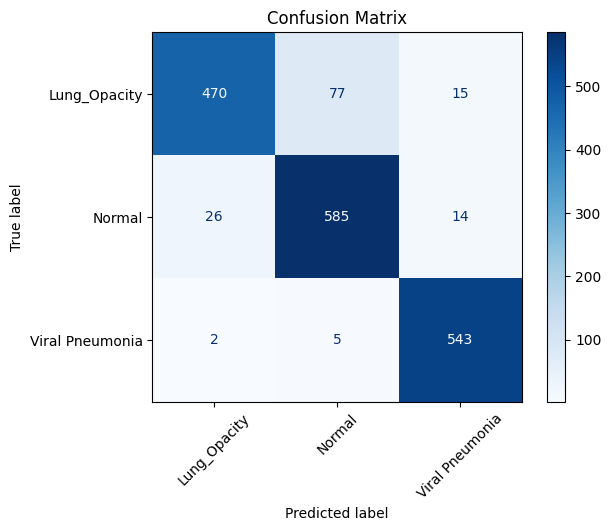

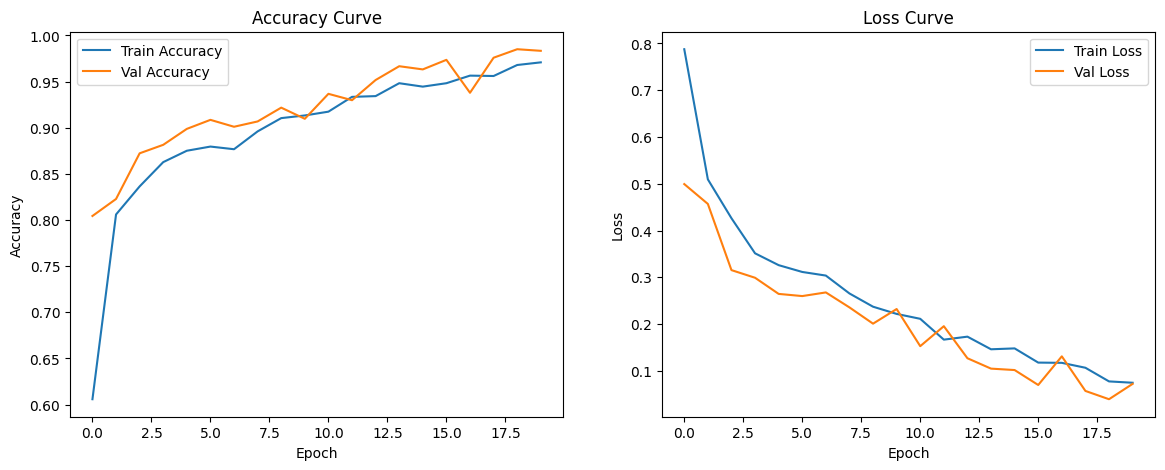

In [9]:
#  EVALUATE 
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()

#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()